In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


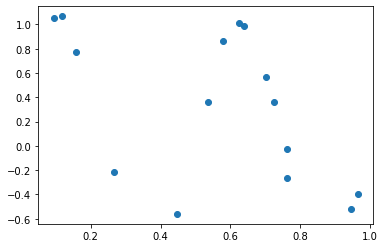

In [ ]:
#### 2.0 ####
n=15
rn = np.random.uniform(0, 1, n)
x = np.reshape(np.sort(rn, axis=0), (n, 1))
def f(x):
  return np.sin(x*(4*np.pi))
np.random.seed(10)
n1 = np.random.normal(0,0.1,n) #noise from 0-0.2
noise = np.reshape(n1,(n,1))
#generate noise and reshape so it is same shape with x
y= f(x) +noise
plt.scatter(x,y)
#plt.plot(x,y)

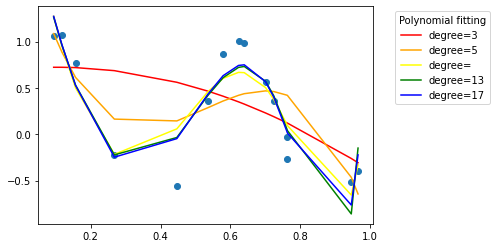

In [ ]:
##### 2.1 #######
def gaussian_basis_fn(x, mu, sigma=0.05):
  return np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2)
def polynomial_basis_fn(x, degree):
  return x ** degree
def make_design(x, basisfn, basisfn_locs=None):
  if basisfn_locs is None:
    return np.concatenate([np.ones(x.shape), basisfn(x)], axis=1)
  else:
    return np.concatenate([np.ones(x.shape)] + [basisfn(x, loc) for loc in basisfn_locs], axis=1)
#training for w
degree = 17
degree1 = 3
learning_rate = 0.0001
degree2 = 5
degree3 = 9
degree4 = 13
degree5 = 17
A = make_design(x,polynomial_basis_fn,range(degree))
A1 = make_design(x,polynomial_basis_fn,range(degree1))
A2 = make_design(x,polynomial_basis_fn,range(degree2))
A3 = make_design(x,polynomial_basis_fn,range(degree3))
A4 = make_design(x,polynomial_basis_fn,range(degree4))
A5 = make_design(x,polynomial_basis_fn,range(degree5))
Agbf1 = make_design(x,gaussian_basis_fn,range(degree1))
def gaussian_basis_fn(x, mu, sigma=0.1):
  return np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2)
Agbf2 = make_design(x,gaussian_basis_fn,range(degree2))
def gaussian_basis_fn(x, mu, sigma=0.25):
  return np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2)
Agbf3 = make_design(x,gaussian_basis_fn,range(degree3))
def gaussian_basis_fn(x, mu, sigma=0.5):
  return np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2)
Agbf4 = make_design(x,gaussian_basis_fn,range(degree4))
def gaussian_basis_fn(x, mu, sigma=1):
  return np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2)
Agbf5 = make_design(x,gaussian_basis_fn,range(degree5))
w = np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)+ learning_rate*np.identity(degree+1)),A.T),y)
# although GBF state degree when calling the function it actually mean mean of the GBF
wgbf1 = np.dot(np.dot(np.linalg.inv(np.dot(A1.T,A1)+ learning_rate*np.identity(degree1+1)),A1.T),y)
wgbf2 = np.dot(np.dot(np.linalg.inv(np.dot(A2.T,A2)+ learning_rate*np.identity(degree2+1)),A2.T),y)
wgbf3 = np.dot(np.dot(np.linalg.inv(np.dot(A3.T,A3)+ learning_rate*np.identity(degree3+1)),A3.T),y)
wgbf4 = np.dot(np.dot(np.linalg.inv(np.dot(A4.T,A4)+ learning_rate*np.identity(degree4+1)),A4.T),y)
wgbf5 = np.dot(np.dot(np.linalg.inv(np.dot(A5.T,A5)+ learning_rate*np.identity(degree5+1)),A5.T),y)
#Regenerate random test set X
np.random.seed(8)
rn = np.random.uniform(0, 1, n)
x2 = np.reshape(np.sort(rn, axis=0), (n, 1))
#testX = make_design(x2,polynomial_basis_fn,range(degree))
ylearnt = np.matmul(A,w)
ygbf1 = np.matmul(A1,wgbf1)
ygbf2 = np.matmul(A2,wgbf2)
ygbf3 = np.matmul(A3,wgbf3)
ygbf4 = np.matmul(A4,wgbf4)
ygbf5 = np.matmul(A5,wgbf5)
plt.scatter(x,y)
#plt.plot(x,ylearnt,'orange')
plt.plot(x,ygbf1,'red',label='degree=3')
plt.plot(x,ygbf2,'orange',label='degree=5')
plt.plot(x,ygbf3,'yellow',label='degree=')
plt.plot(x,ygbf4,'green',label='degree=13')
plt.plot(x,ygbf5,'blue',label='degree=17')
plt.legend(title = 'Polynomial fitting',bbox_to_anchor=(1.05, 1))

(30, 50)


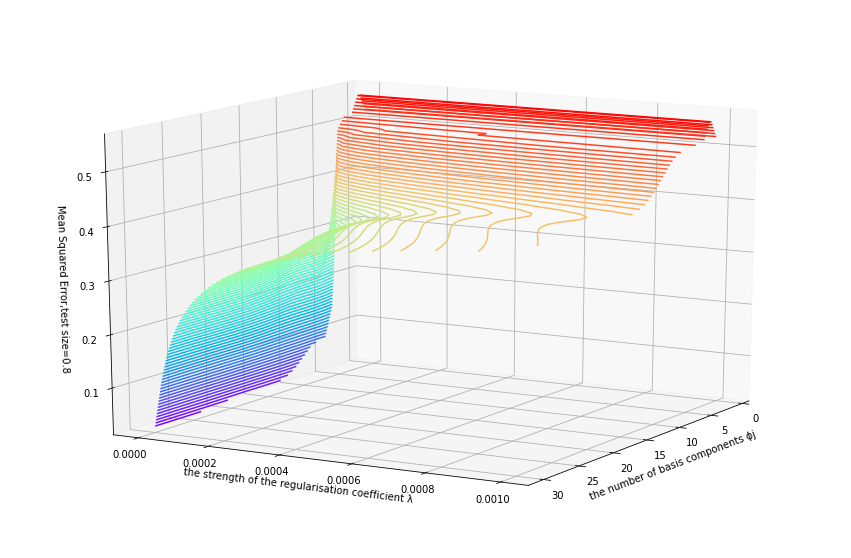

In [ ]:
#####  2.2  #####
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
n3 = 25
np.random.seed(12)
rn = np.random.uniform(0, 1, n3)
x3 = np.reshape(np.sort(rn, axis=0), (n3, 1))

#generate noise and reshape so it is same shape with x
noi3 = np.random.normal(0,0.2,n3) #noise from 0-0.2
noise3 = np.reshape(noi3,(n3,1))
y3= f(x3) +noise3

#   splitting test and training data
#X_train, X_test, y_train, y_test = train_test_split(x3, y3, test_size=0.2, random_state=42)
#plt.scatter(x3,y3)

#   start learning
degree_2 = 17
learning_rate = 0.0000022
x3poly = make_design(x3,polynomial_basis_fn,range(degree_2))
w3 = np.dot(np.dot(np.linalg.inv(np.dot(x3poly.T,x3poly)+ learning_rate*np.identity(degree_2+1)),x3poly.T),y3)
y3learnt = np.matmul(x3poly,w3)
#plt.title('X vs Y ,N=25')
#plt.plot(x3,y3learnt,'yellow')
#   splitting test and training data

X_train, X_test, y_train, y_test = train_test_split(x3, y3learnt, test_size=0.2, random_state=42)
def mean_se(X_test,y_test,test_size=0.2*y3learnt.size):
  y = f(X_test)
  MSE = 0
  for i in range(int(test_size)):
    MSE += (y[i]-y_test[i])**2
  MSE = MSE/test_size
  return MSE
#print(mean_se(X_test,y_test))

#   Measure the number of basis components ϕj and the strength of the regularisation coefficient λ against Mean Squared Error
def illustrate_MSE(polynomialrange,learning_range,x3,y3):
  MSE = np.zeros((len(polynomialrange),len(learningrange)))
  for i in range(len(polynomialrange)):
    for j in range(len(learningrange)):
      xipoly = make_design(x3,polynomial_basis_fn,range(int(polynomialrange[i])))
      wi = np.matmul(np.matmul(np.linalg.inv(np.matmul(xipoly.T,xipoly)+ learning_range[j]*np.identity(int(polynomialrange[i])+1)),xipoly.T),y3)
      yilearnt = np.matmul(xipoly,wi)
      X_train1, X_test1, y_train1, y_test1 = train_test_split(x3, yilearnt, test_size=0.2, random_state=42)
      MSE[i][j] = mean_se(X_test1,y_test1)
  return MSE
polynomialrange = np.linspace(1,30,num=30)
learningrange = np.linspace(0.000001, 0.001, num=50)
X, Y = np.meshgrid(polynomialrange, learningrange)
MSEmesh = illustrate_MSE(polynomialrange,learningrange,x3,y3)
print((illustrate_MSE(polynomialrange,learningrange,x3,y3)).shape)
#print(illustrate_MSE(polynomialrange,learningrange,x3,y3))
MSEmesh = MSEmesh.T
fig = plt.figure(figsize=(15,10))
#fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D( X , Y , MSEmesh, 100,cmap='rainbow',stride= 10)
#ax.plot3D(polynomialrange , learningrange , MSEmesh, 'gray')
ax.set_xlabel('the number of basis components ϕj')
ax.set_ylabel('the strength of the regularisation coefficient λ')
ax.set_zlabel('Mean Squared Error,test size=0.8')
ax.view_init(15,30)